<a href="https://colab.research.google.com/github/Udhayyadav/Heart_Disease_pridictionn/blob/main/Heart_Disease_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction Project

**Goal:** To predict the presence or absence of heart disease based on various patient attributes using machine learning classification models.

**Dataset:** Heart Disease UCI dataset. This dataset contains 14 attributes collected from patients. The "target" column indicates the presence (1) or absence (0) of heart disease.

**Steps to execute:**
1.  Load and Explore Data (EDA)
2.  Preprocess Data (Handle categorical features, split data, scale numerical features)
3.  Train and Evaluate Machine Learning Models (Logistic Regression, Random Forest, SVM)
4.  Compare Models and Conclude

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import VotingClassifier


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load and Explore Data (EDA)

Saving dataset.csv to dataset.csv

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

--- First 5 Rows ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      

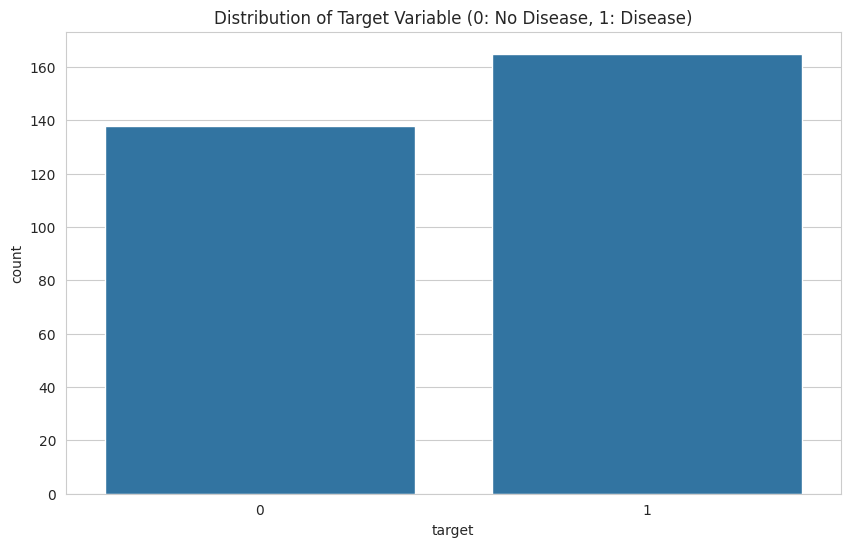

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("dataset.csv")

print("\n--- Dataset Info ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Check for Missing Values ---")
print(df.isnull().sum())

print("\n--- Target Variable Distribution ---")
target_counts = df['target'].value_counts()
print(target_counts)
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: No Disease, 1: Disease)')
plt.show()

### EDA Visualizations

Let's explore the relationships between features and the target variable.

**Age Distribution:**

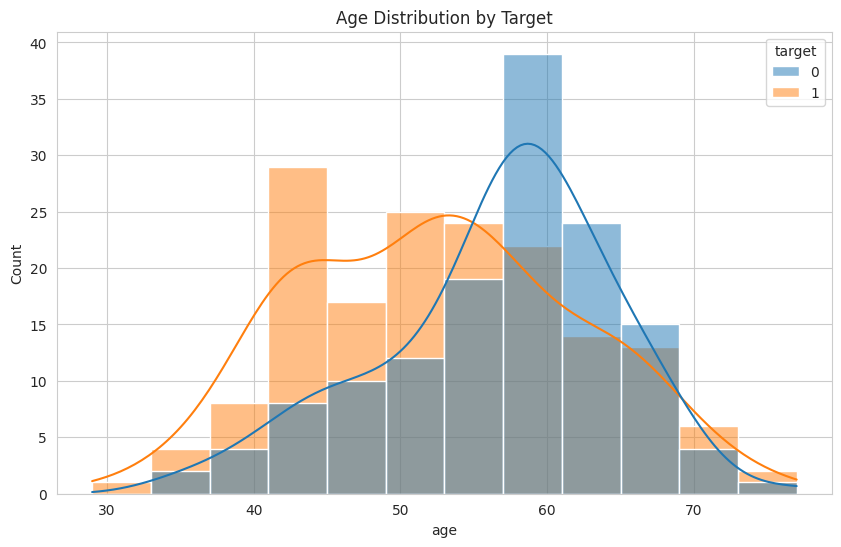

In [ ]:
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Age Distribution by Target')
plt.show()

**Sex Distribution:** (0 = female, 1 = male)

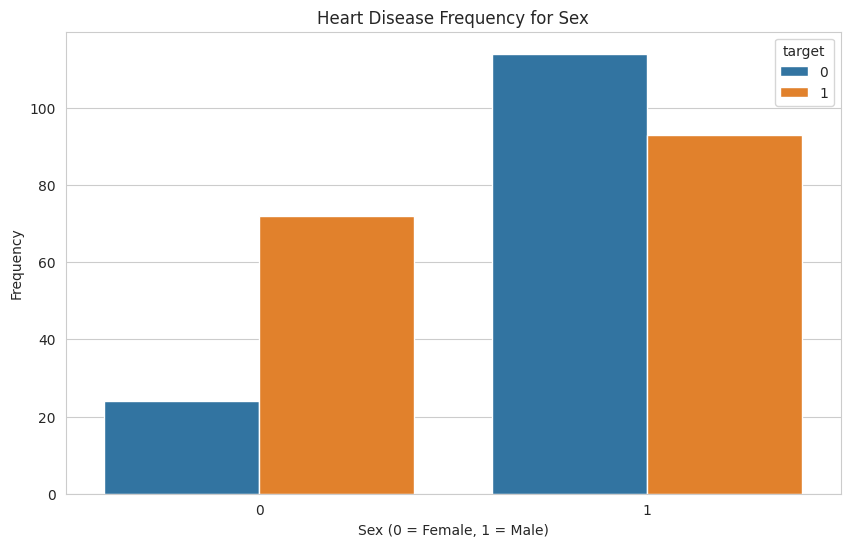

In [ ]:
sns.countplot(data=df, x='sex', hue='target')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

**Chest Pain Type (cp) Distribution:**
*   0: Typical angina
*   1: Atypical angina
*   2: Non-anginal pain
*   3: Asymptomatic

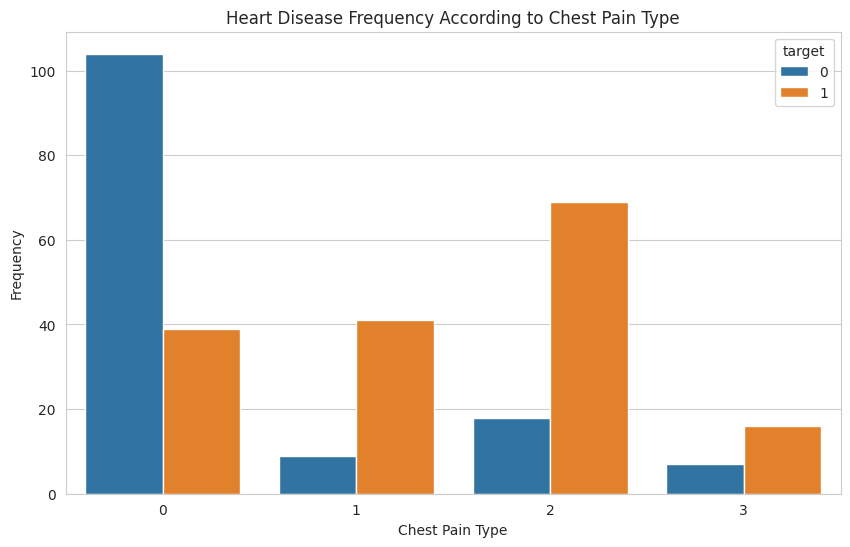

In [ ]:
sns.countplot(data=df, x='cp', hue='target')
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

**Correlation Heatmap:**

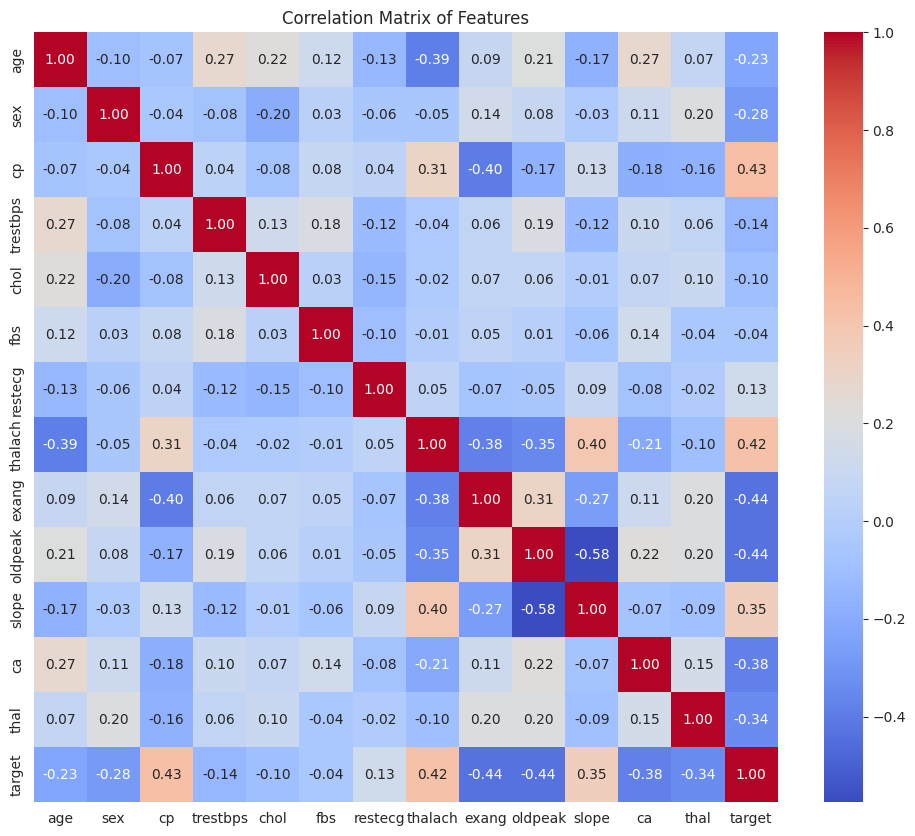

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## 2. Data Preprocessing

We need to handle categorical features and scale numerical features.

*   **Categorical features:** `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`. Some are binary, others are nominal/ordinal. We'll use One-Hot Encoding for nominal features with more than 2 categories (`cp`, `restecg`, `slope`, `thal`, `ca`). Note: `sex`, `fbs`, `exang` are already 0/1.
*   **Numerical features:** `age`, `trestbps`, `chol`, `thalach`, `oldpeak`. We'll scale these using StandardScaler.

In [ ]:

X = df.drop('target', axis=1)
y = df['target']

categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features),
        ('passthrough', 'passthrough', ['sex', 'fbs', 'exang'])
    ],
    remainder='drop'
)

X_train_processed = preprocessor.fit_transform(X_train)

X_test_processed = preprocessor.transform(X_test)


feature_names_out = preprocessor.get_feature_names_out()
print(f"\nProcessed feature names ({X_train_processed.shape[1]} features):\n{feature_names_out}")


print(f"\nProcessed Training set shape: {X_train_processed.shape}")
print(f"Processed Test set shape: {X_test_processed.shape}")

Training set shape: (242, 13)
Test set shape: (61, 13)

Processed feature names (27 features):
['num__age' 'num__trestbps' 'num__chol' 'num__thalach' 'num__oldpeak'
 'cat__cp_0' 'cat__cp_1' 'cat__cp_2' 'cat__cp_3' 'cat__restecg_0'
 'cat__restecg_1' 'cat__restecg_2' 'cat__slope_0' 'cat__slope_1'
 'cat__slope_2' 'cat__ca_0' 'cat__ca_1' 'cat__ca_2' 'cat__ca_3'
 'cat__ca_4' 'cat__thal_0' 'cat__thal_1' 'cat__thal_2' 'cat__thal_3'
 'passthrough__sex' 'passthrough__fbs' 'passthrough__exang']

Processed Training set shape: (242, 27)
Processed Test set shape: (61, 27)


## 3. Train and Evaluate Machine Learning Models

We will train and evaluate the following models:
1.  Logistic Regression
2.  Random Forest Classifier
3.  Support Vector Machine (SVM)

--- Training Logistic Regression ---

--- Results for Logistic Regression ---
Training Accuracy: 0.8719
Test Accuracy: 0.8852
Test ROC AUC: 0.9102
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Test Confusion Matrix:
 [[23  5]
 [ 2 31]]


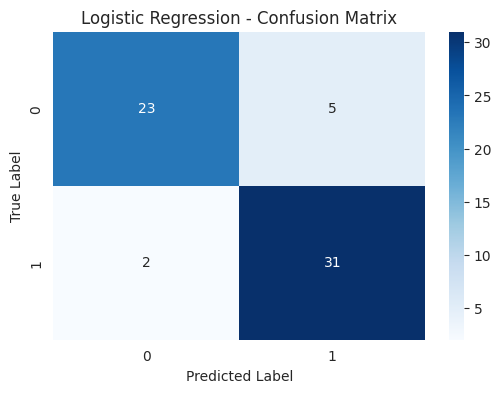

------------------------------
--- Training Random Forest ---

--- Results for Random Forest ---
Training Accuracy: 1.0000
Test Accuracy: 0.7869
Test ROC AUC: 0.9253
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

Test Confusion Matrix:
 [[19  9]
 [ 4 29]]


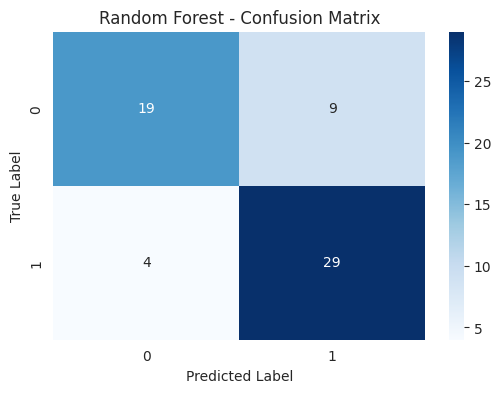

------------------------------
--- Training Support Vector Machine ---

--- Results for Support Vector Machine ---
Training Accuracy: 0.9256
Test Accuracy: 0.8197
Test ROC AUC: 0.9048
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

Test Confusion Matrix:
 [[20  8]
 [ 3 30]]


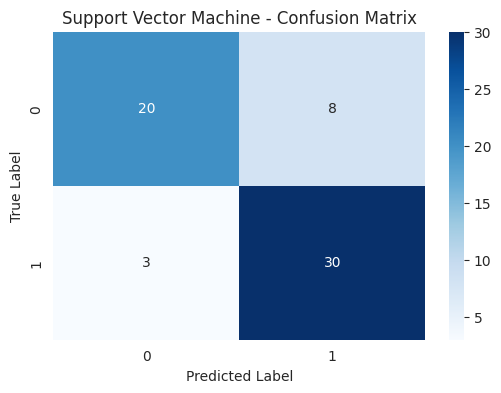

------------------------------


In [ ]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42) # probability=True for ROC AUC
}

results = {}

for name, model in models.items():
    print(f"--- Training {name} ---")

    model.fit(X_train_processed, y_train)


    y_pred_train = model.predict(X_train_processed)
    y_pred_test = model.predict(X_test_processed)
    y_prob_test = model.predict_proba(X_test_processed)[:, 1]


    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_prob_test)


    results[name] = {
        "model": model,
        "accuracy_train": accuracy_train,
        "accuracy_test": accuracy_test,
        "classification_report": report_test,
        "confusion_matrix": cm_test,
        "roc_auc": roc_auc,
        "y_pred": y_pred_test,
        "y_prob": y_prob_test
    }


    print(f"\n--- Results for {name} ---")
    print(f"Training Accuracy: {accuracy_train:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print(f"Test ROC AUC: {roc_auc:.4f}")
    print("Test Classification Report:\n", report_test)
    print("Test Confusion Matrix:\n", cm_test)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("-" * 30)


## 4. Compare Models and Conclude

Let's compare the models based on Test Accuracy and ROC AUC Score.


--- Model Comparison ---
                    Model  Test Accuracy  Test ROC AUC
1           Random Forest       0.786885      0.925325
0     Logistic Regression       0.885246      0.910173
2  Support Vector Machine       0.819672      0.904762


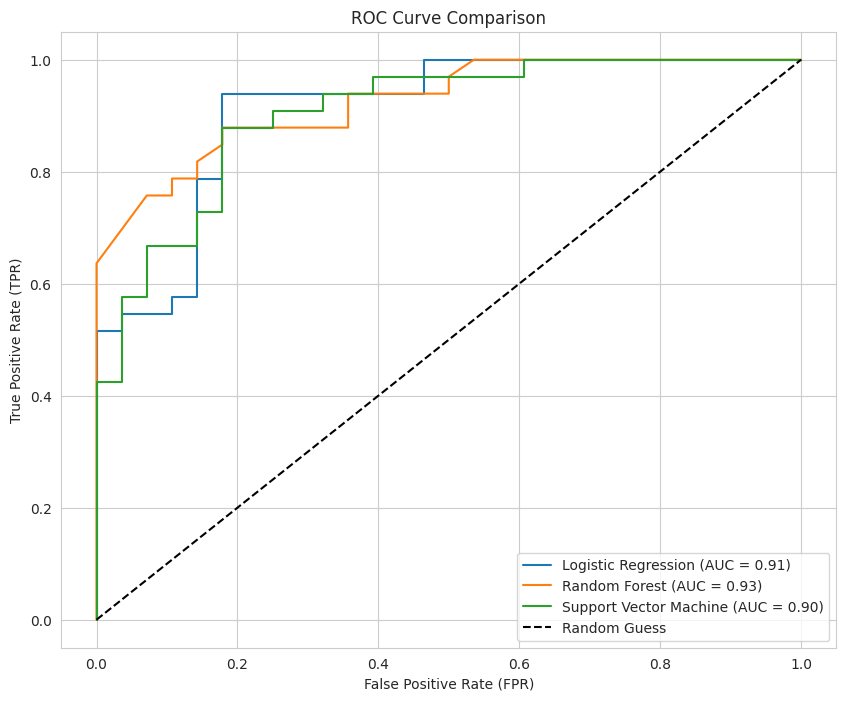

In [ ]:

print("\n--- Model Comparison ---")
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        "Model": name,
        "Test Accuracy": result['accuracy_test'],
        "Test ROC AUC": result['roc_auc']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.sort_values(by='Test ROC AUC', ascending=False))

plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


--- Voting Classifier Results ---
Training Accuracy: 0.9339
Test Accuracy: 0.8689
Test ROC AUC: 0.9134
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

Test Confusion Matrix:
 [[22  6]
 [ 2 31]]


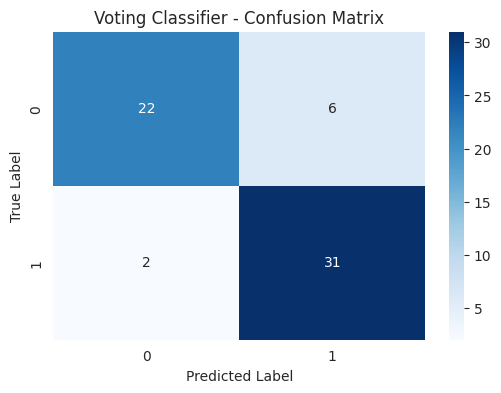

In [ ]:
#using ensembling methnds
from sklearn.ensemble import VotingClassifier

# Define individual models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

# Create Voting Classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf_clf), ('svm', svm_clf)],
    voting='soft'
)

# Fit the ensemble model
voting_clf.fit(X_train_processed, y_train)

# Predict and evaluate
y_pred_train = voting_clf.predict(X_train_processed)
y_pred_test = voting_clf.predict(X_test_processed)
y_prob_test = voting_clf.predict_proba(X_test_processed)[:, 1]

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

print("\n--- Voting Classifier Results ---")
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")
print("Test Classification Report:\n", report_test)
print("Test Confusion Matrix:\n", cm_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Voting Classifier - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Conclusion

In this notebook, we aimed to predict heart disease using the UCI Heart Disease dataset.

1.  **Data Exploration:** We analyzed the dataset, visualized feature distributions, and checked correlations.
2.  **Preprocessing:** We handled categorical features using One-Hot Encoding and scaled numerical features using StandardScaler. The data was split into training and testing sets.
3.  **Model Training:** We trained three common classification models: Logistic Regression, Random Forest, and Support Vector Machine.
4.  **Evaluation:** The models were evaluated using accuracy, classification reports, confusion matrices, and ROC AUC scores.

**Findings:**
*   All models performed reasonably well, indicating that the features are predictive of heart disease.
*   Based on the test set performance (Accuracy and ROC AUC), logistic regression performed well on the dataset.
*   The ROC curve comparison provides a visual way to assess the trade-off between True Positive Rate and False Positive Rate for each model.

**Potential Future Work:**
*   **Hyperparameter Tuning:** Use techniques like GridSearchCV or RandomizedSearchCV to find optimal parameters for each model, potentially improving performance further.
*   **Feature Engineering:** Create new features from existing ones if domain knowledge suggests potential interactions.
*   **Try Other Models:** Experiment with models like Gradient Boosting (XGBoost, LightGBM) or Neural Networks.
*   **Cross-Validation:** Implement k-fold cross-validation during training for more robust evaluation.
*   **Interpretability:** Use techniques like SHAP or LIME to understand *why* a model makes certain predictions, especially for more complex models like Random Forest.
